In [1]:
import numpy as np
import pandas as pd

In [2]:
sleep_df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', keep_default_na=False, na_values=[''])

In [3]:
sleep_df.sample(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
35,36,Male,31,Doctor,6.1,6,30,8,Normal,125/80,72,5000,None
73,74,Male,33,Doctor,6.1,6,30,8,Normal,125/80,72,5000,None
177,178,Male,42,Salesperson,6.5,6,45,7,Overweight,130/85,72,6000,Insomnia
52,53,Male,32,Doctor,6.0,6,30,8,Normal,125/80,72,5000,None
45,46,Male,31,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
15,16,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,None
16,17,Female,29,Nurse,6.5,5,40,7,Normal Weight,132/87,80,4000,Sleep Apnea
310,311,Female,52,Accountant,6.6,7,45,7,Overweight,130/85,72,6000,Insomnia
152,153,Male,39,Lawyer,7.2,8,60,5,Normal,130/85,68,8000,None
19,20,Male,30,Doctor,7.6,7,75,6,Normal,120/80,70,8000,None


In [4]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
#check duplicates
sleep_df.duplicated().sum()

0

In [6]:
#drop 'Person ID' column
sleep_df.drop(columns=['Person ID'], inplace=True)

In [8]:
# Split the 'Blood Pressure' column into two new columns 'Systolic' and 'Diastolic', and convert to integers
sleep_df[['Systolic', 'Diastolic']] = sleep_df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Drop the original 'Blood Pressure' column if no longer needed
sleep_df = sleep_df.drop(columns=['Blood Pressure'])

In [9]:
sleep_df.sample(10)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
163,Male,40,Lawyer,7.9,8,90,5,Normal,68,8000,None,130,85
226,Female,44,Teacher,6.6,7,45,4,Overweight,65,6000,Insomnia,135,90
99,Female,36,Teacher,7.1,8,60,4,Normal,68,7000,None,115,75
98,Female,36,Teacher,7.1,8,60,4,Normal,68,7000,None,115,75
54,Male,32,Doctor,6.0,6,30,8,Normal,72,5000,None,125,80
157,Male,39,Lawyer,7.2,8,60,5,Normal,68,8000,None,130,85
329,Female,53,Engineer,8.5,9,30,3,Normal,65,5000,None,125,80
133,Female,38,Accountant,7.1,8,60,4,Normal,68,7000,None,115,75
48,Male,31,Doctor,7.7,7,75,6,Normal,70,8000,None,120,80
167,Male,41,Lawyer,7.1,7,55,6,Overweight,72,6000,None,125,82


In [10]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

{'Female': 0, 'Male': 1}
Gender
1    189
0    185
Name: count, dtype: int64


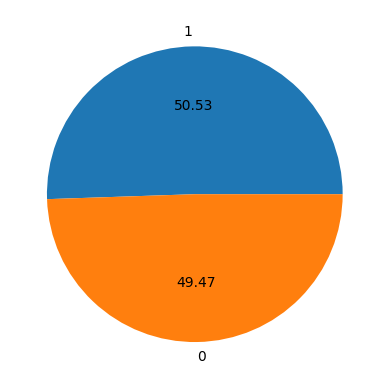

In [11]:
# Initialize and fit LabelEncoder
label_encoder = LabelEncoder()
sleep_df['Gender'] = label_encoder.fit_transform(sleep_df['Gender'])

# Get the mapping of encoded numbers to string labels
reverse_label_mapping = {v: k for k, v in enumerate(label_encoder.classes_)}
print(reverse_label_mapping)

# Get value counts for the original 'Gender' column
value_counts = sleep_df['Gender'].value_counts()
print(value_counts)

# Create pie chart
plt.pie(value_counts, labels=value_counts.index, autopct="%0.2f")
plt.show()

Value Counts:
 Occupation
5     73
1     71
2     63
3     47
10    40
0     37
7     32
9      4
8      4
6      2
4      1
Name: count, dtype: int64
{'Accountant': 0, 'Doctor': 1, 'Engineer': 2, 'Lawyer': 3, 'Manager': 4, 'Nurse': 5, 'Sales Representative': 6, 'Salesperson': 7, 'Scientist': 8, 'Software Engineer': 9, 'Teacher': 10}


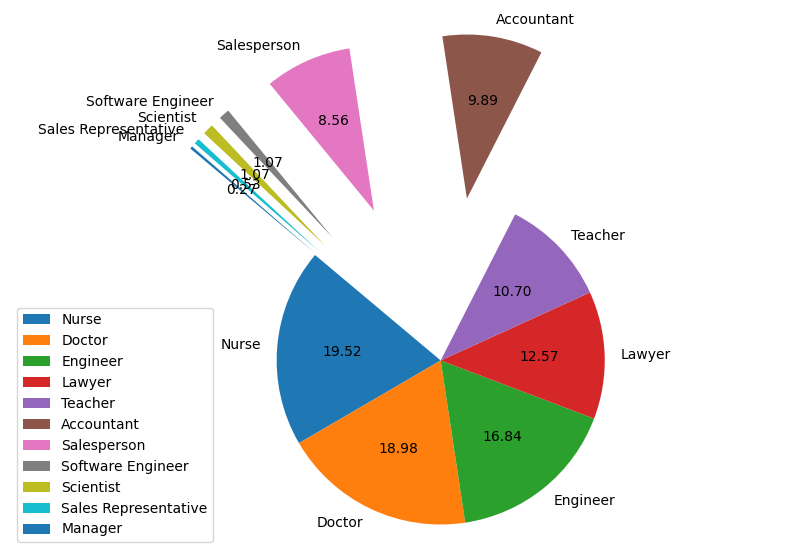

In [12]:
# Initialize and fit LabelEncoder
label_encoder = LabelEncoder()
sleep_df['Occupation'] = label_encoder.fit_transform(sleep_df['Occupation'])

# Get value counts for the encoded 'Occupation' column
value_counts = sleep_df['Occupation'].value_counts()
print("Value Counts:\n", value_counts)

# Get the mapping of encoded numbers to string labels
reverse_label_mapping = {v: k for k, v in enumerate(label_encoder.classes_)}
print(reverse_label_mapping)

# Decode the labels back to original string labels
labels = label_encoder.inverse_transform(value_counts.index)

# Define explode parameter to separate small segments
total_count = value_counts.sum()
explode = [1 if count < total_count * 0.1 else 0 for count in value_counts]

# Create pie chart with adjustments
plt.figure(figsize=(10, 7))
plt.pie(value_counts, labels=labels, autopct="%0.2f", explode=explode, startangle=140)

# Add legend to avoid overlapping labels
plt.legend(labels, loc="best")
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()

{'Normal': 0, 'Normal Weight': 1, 'Obese': 2, 'Overweight': 3}
BMI Category
0    195
3    148
1     21
2     10
Name: count, dtype: int64


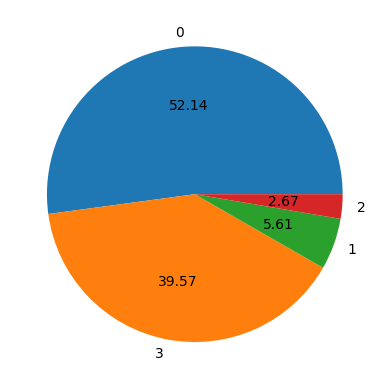

In [13]:
# Initialize and fit LabelEncoder
label_encoder = LabelEncoder()
sleep_df['BMI Category'] = label_encoder.fit_transform(sleep_df['BMI Category'])

# Get the mapping of encoded numbers to string labels
reverse_label_mapping = {v: k for k, v in enumerate(label_encoder.classes_)}
print(reverse_label_mapping)

# Get value counts for the original 'BMI Category' column
value_counts = sleep_df['BMI Category'].value_counts()
print(value_counts)

# Create pie chart
plt.pie(value_counts, labels=value_counts.index, autopct="%0.2f")
plt.show()

{'Insomnia': 0, 'None': 1, 'Sleep Apnea': 2}
Sleep Disorder
1    219
2     78
0     77
Name: count, dtype: int64


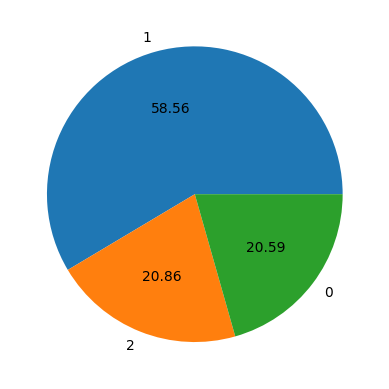

In [14]:
# Initialize and fit LabelEncoder
label_encoder = LabelEncoder()
sleep_df['Sleep Disorder'] = label_encoder.fit_transform(sleep_df['Sleep Disorder'])

# Get the mapping of encoded numbers to string labels
reverse_label_mapping = {v: k for k, v in enumerate(label_encoder.classes_)}
print(reverse_label_mapping)

# Get value counts for the original 'Sleep Disorder' column
value_counts = sleep_df['Sleep Disorder'].value_counts()
print(value_counts)

# Create pie chart
plt.pie(value_counts, labels=value_counts.index, autopct="%0.2f")
plt.show()

In [15]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    int32  
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    int32  
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    int32  
 8   Heart Rate               374 non-null    int64  
 9   Daily Steps              374 non-null    int64  
 10  Sleep Disorder           374 non-null    int32  
 11  Systolic                 374 non-null    int32  
 12  Diastolic                374 non-null    int32  
dtypes: float64(1), int32(6), int64(6)
memory usage: 29.3 KB


In [16]:
sleep_df.corr()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic
Gender,1.000000,-0.596358,-0.219113,-0.121579,-0.291366,0.001454,0.396018,-0.352060,0.217105,-0.014509,-0.253415,-0.210527,-0.268378
Age,-0.596358,1.000000,0.231188,0.344709,0.473734,0.178993,-0.422344,0.511329,-0.225606,0.057973,0.232000,0.605878,0.593839
Occupation,-0.219113,0.231188,1.000000,-0.325775,-0.278071,-0.103660,0.021123,0.699504,0.043928,-0.105877,-0.169800,0.518561,0.521835
Sleep Duration,-0.121579,0.344709,-0.325775,1.000000,0.883213,0.212360,-0.811023,-0.376358,-0.516455,-0.039533,0.177552,-0.180406,-0.166570
Quality of Sleep,-0.291366,0.473734,-0.278071,0.883213,1.000000,0.192896,-0.898752,-0.312562,-0.659865,0.016791,0.179592,-0.121632,-0.110151
Physical Activity Level,0.001454,0.178993,-0.103660,0.212360,0.192896,1.000000,-0.034134,0.077156,0.136971,0.772723,0.433214,0.265416,0.382651
Stress Level,0.396018,-0.422344,0.021123,-0.811023,-0.898752,-0.034134,1.000000,0.163895,0.670026,0.186829,-0.036058,0.102818,0.091811
BMI Category,-0.352060,0.511329,0.699504,-0.376358,-0.312562,0.077156,0.163895,1.000000,0.295585,-0.005059,0.016573,0.714057,0.750869
Heart Rate,0.217105,-0.225606,0.043928,-0.516455,-0.659865,0.136971,0.670026,0.295585,1.000000,-0.030309,0.205987,0.294143,0.271092
Daily Steps,-0.014509,0.057973,-0.105877,-0.039533,0.016791,0.772723,0.186829,-0.005059,-0.030309,1.000000,0.342098,0.103342,0.241986


In [20]:
import seaborn as sns

<Axes: >

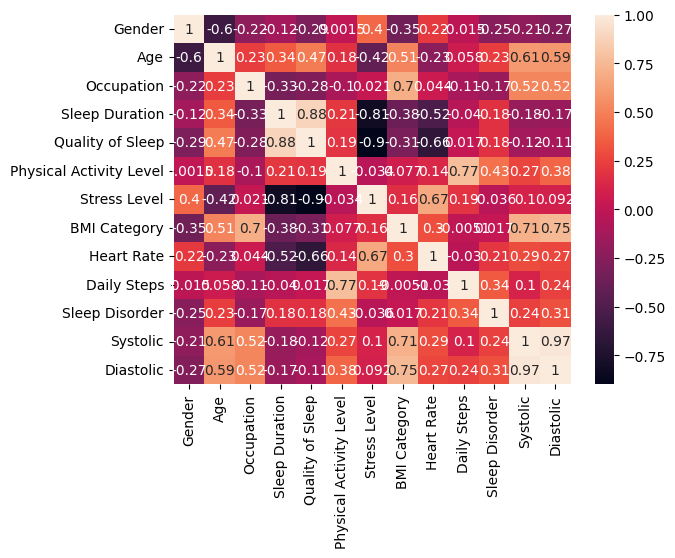

In [21]:
sns.heatmap(sleep_df.corr(),annot=True)

In [22]:
sleep_df.to_csv('cleaned_sleep_data.csv')